Fundamentals of Inferential Statistics (1) - sampling distribution and central limit theorem

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import scipy.stats


What is a sampling distribution?
In statistics, when studying a population, we often take a random sample from the population. When we repeatedly take a sample, calculate the mean ( or can be other statistic) and repeat this across N samples, we obtain a sampling distribution (of the sample mean). 

In [5]:
mu1, sigma1 = 1, 0.1 # mean and standard deviation
population_sample = np.random.normal(mu1, sigma1, 10000)
df = pd.DataFrame(population_sample, columns = ["values"])

In [6]:
df.head()

,values
0,0.824768
1,0.969394
2,1.014065
3,0.916398
4,0.836584


(0.5932473581248743, 1.4224970136244388)

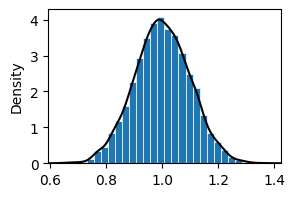

In [7]:
ax = df['values'].plot.hist(figsize=(3, 2), bins=30, density=True, edgecolor='w', linewidth=0.5)
xlim = ax.get_xlim()

# Plot pandas KDE
df['values'].plot.density(color='k', alpha=1, ax=ax) 

# Reset x-axis limits and edit legend and add title
ax.set_xlim(xlim)


In [29]:
# Define the gausssion pdf function
def gaussian_pdf(mu, sigma, bins):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))

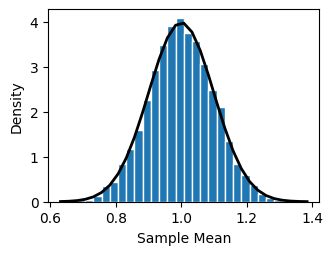

In [30]:
# Plot population 
fig, ax = plt.subplots(figsize=(3.5, 2.5))

count, bins1, ignored = ax.hist(population_sample, 30, density=True, edgecolor='white')
ax.set_xlabel('Sample Mean')
ax.set_ylabel('Density')

ax.plot(bins1, gaussian_pdf(mu1, sigma1, bins1), 'k', linewidth=2)

A random sample (with replacement) from the population can look like this: 

In [9]:
from random import sample

sample_size = 100
random_sample = np.random.choice(population_sample, size=sample_size, replace=True)
print(f"Mean: {np.mean(random_sample)}")


Mean: 0.99526662714178


If we repeated take a random sample, and calculate the mean, and plot the distribution, we arrive at the sampling distribution of the sample mean

In [19]:
def rand_sample_calc_mean(num_samples, sample_size, population):
    mean_list = np.zeros(num_samples)
    for n in range(num_samples):
        random_sample = np.random.choice(population, size = sample_size, replace = True)
        mean_list[n] = np.mean(random_sample)
    return mean_list

In [34]:
sampling_distribution = rand_sample_calc_mean(100, 100, population_sample)
sampling_distribution[:5]

array([0.99132023, 0.99791424, 0.98707129, 1.01271673, 1.01368693])

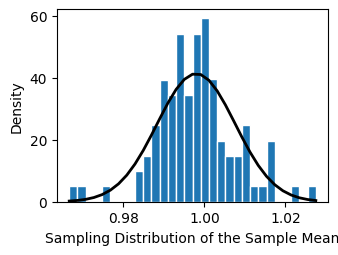

In [35]:
# Plot sampling distribution for 100 samples, each with N = 100
fig, ax = plt.subplots(figsize=(3.5, 2.5))

count, bins1, ignored = ax.hist(sampling_distribution, 30, density=True, edgecolor='white')
ax.set_xlabel('Sampling Distribution of the Sample Mean')
ax.set_ylabel('Density')

ax.plot(bins1, gaussian_pdf(np.mean(sampling_distribution), np.std(sampling_distribution), bins1), 'k', linewidth=2)

To explore how the sample size (N) affects the sampling distribution let's try a couple of parameters

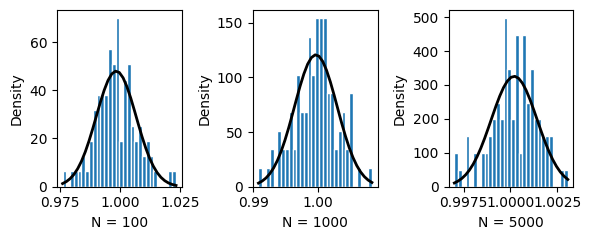

In [57]:
fig, ax = plt.subplots(1, 3, figsize=(6, 2.5))

sm = 100
med = 1000
lg = 5000

sampling_distribution_sm = rand_sample_calc_mean(100, sm, population_sample)
sampling_distribution_med = rand_sample_calc_mean(100, med, population_sample)
sampling_distribution_lg = rand_sample_calc_mean(100, lg, population_sample)

count, bins, ignored = ax[0].hist(sampling_distribution_sm, 30, density=True, edgecolor='white')
ax[0].set_xlabel(f"N = {sm}")
ax[0].set_ylabel('Density')
ax[0].plot(bins, gaussian_pdf(np.mean(sampling_distribution_sm), np.std(sampling_distribution_sm), bins), 'k', linewidth=2)

count, bins, ignored = ax[1].hist(sampling_distribution_med, 30, density=True, edgecolor='white')
ax[1].set_xlabel(f"N = {med}")
ax[1].set_ylabel('Density')
ax[1].plot(bins, gaussian_pdf(np.mean(sampling_distribution_med), np.std(sampling_distribution_med), bins), 'k', linewidth=2)

count, bins, ignored = ax[2].hist(sampling_distribution_lg, 30, density=True, edgecolor='white')
ax[2].set_xlabel(f"N = {lg}")
ax[2].set_ylabel('Density')
ax[2].plot(bins, gaussian_pdf(np.mean(sampling_distribution_lg), np.std(sampling_distribution_lg), bins), 'k', linewidth=2)

plt.tight_layout()

There are some interesting properties:

1) The sampling distribution of the sample mean approximates a normal distribution
2) The population can be from ANY distribution, and the mean of the sampling distribution will be close to that of the original distribution. (Although if N < 30, it may not be normal if original distribution is skewed) 
3) The standard deviation of the sampling distribution (SEM) approximates the original population's standard deviation $\sigma$ <br>
SEM = $\sigma$/sqrt(N)

The normal distribution has some very interesting properties, based on its standard deviation and probability as area under the curve

Let's go back to our original population: 

In [62]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

count, bins1, ignored = ax.hist(population_sample, 30, density=True, edgecolor='white')
ax.set_xlabel('Sample Mean')
ax.set_ylabel('Density')
plt.close()

The numbers describe the area of the curve between standard deviation steps. This is useful for calculating the probability that a value is within a certain range in various inferential statistics. 

Text(0.75, -0.19630300577311727, '2.3%')

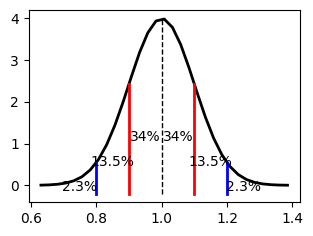

In [78]:
plt.subplots(figsize=(3.5, 2.5))
plt.plot(bins1, gaussian_pdf(mu1, sigma1, bins1), 'k', linewidth=2)
ylim = plt.gca().get_ylim()

# midline
plt.plot([mu1, mu1], [ylim[0], gaussian_pdf(mu1, sigma1, mu1)], '--k', linewidth=1)

# 1 std dev
plt.plot([mu1 + sigma1, mu1 + sigma1], [ylim[0], gaussian_pdf(mu1, sigma1, mu1+sigma1)], '-r', linewidth=2)
plt.plot([mu1 - sigma1, mu1 - sigma1], [ylim[0], gaussian_pdf(mu1, sigma1, mu1-sigma1)], '-r', linewidth=2)

# 2 std dev 
plt.plot([mu1 + 2*sigma1, mu1 + 2*sigma1], [ylim[0], gaussian_pdf(mu1, sigma1, mu1+2*sigma1)], '-b', linewidth=2)
plt.plot([mu1 - 2*sigma1, mu1 - 2*sigma1], [ylim[0], gaussian_pdf(mu1, sigma1, mu1-2*sigma1)], '-b', linewidth=2)

# add labels
plt.text(mu1+0.5*sigma1, 1, '34%', ha='center', va='bottom')
plt.text(mu1-0.5*sigma1, 1, '34%', ha='center', va='bottom')

plt.text(mu1+1.5*sigma1, 0.4, '13.5%', ha='center', va='bottom')
plt.text(mu1-1.5*sigma1, 0.4, '13.5%', ha='center', va='bottom')

plt.text(mu1+2.5*sigma1, ylim[0], '2.3%', ha='center', va='bottom')
plt.text(mu1-2.5*sigma1, ylim[0], '2.3%', ha='center', va='bottom')